In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np

In [2]:
def coverttime(x):
    return datetime.strptime(x,'%Y %d %M') 
    

In [3]:
df=pd.read_csv('Tractor-Sales.csv',parse_dates=['Month-Year'])

In [4]:
df.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [5]:
df['Month-Year']='2020-' + df['Month-Year']

In [6]:
df.head()

,Month-Year,Number of Tractor Sold
0,2020-Jan-03,141
1,2020-Feb-03,157
2,2020-Mar-03,185
3,2020-Apr-03,199
4,2020-May-03,203


In [7]:
df.index=df['Month-Year']

In [8]:
df.head()

,Month-Year,Number of Tractor Sold
Month-Year,,
2020-Jan-03,2020-Jan-03,141
2020-Feb-03,2020-Feb-03,157
2020-Mar-03,2020-Mar-03,185
2020-Apr-03,2020-Apr-03,199
2020-May-03,2020-May-03,203


In [9]:
df.columns

Index(['Month-Year', 'Number of Tractor Sold'], dtype='object')

In [10]:
df.columns=['month-year','value']

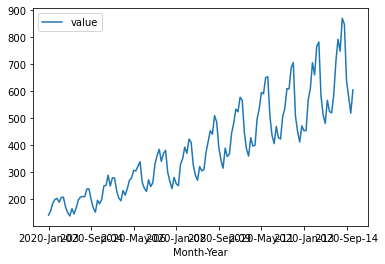

In [11]:
df.plot()

In [12]:
df.shape


(144, 2)

In [13]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.108825
p-value: 0.995291


In [23]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [28]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(df.value, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=0.721, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=0.712, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1.242, Time=0.00 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.509 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   31
Model:               SARIMAX(0, 2, 0)   Log Likelihood                   1.621
Date:                Fri, 06 Nov 2020   AIC                             -1.242
Time:                        00:26:19   BIC                              0.125
Sample:                             0   HQIC                            -0.814
                                 - 31                                         
Covariance Type

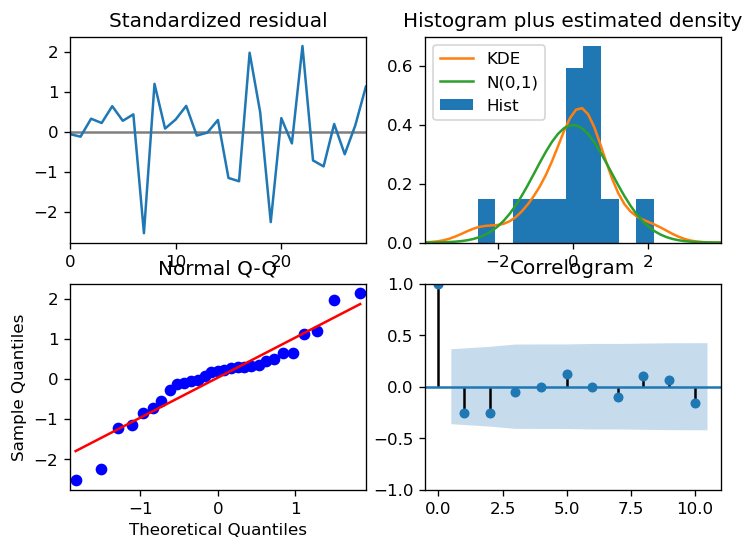

In [29]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

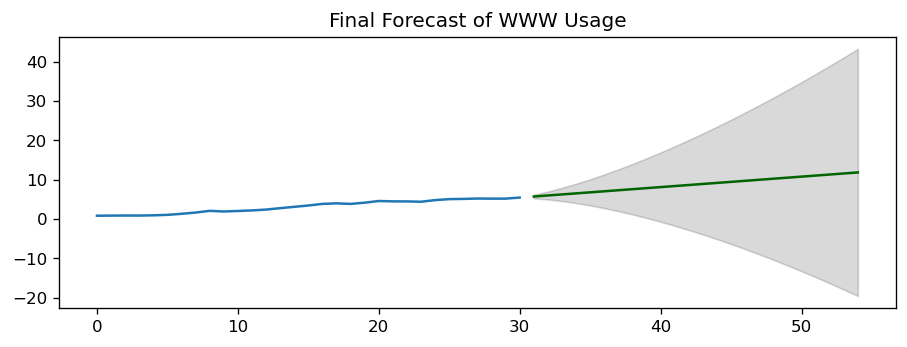

In [30]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

In [31]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df.value, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=5.301, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=1.241, Time=0.19 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=7.270, Time=0.03 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=3.241, Time=0.42 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=3.241, Time=0.22 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=5.241, Time=0.45 sec
 ARIMA(0,2,0)(1,1,0)[12]             : AIC=0.093, Time=0.09 sec
 ARIMA(0,2,0)(2,1,0)[12]             : AIC=2.093, Time=0.17 sec
 ARIMA(0,2,0)(1,1,1)[12]             : AIC=2.093, Time=0.27 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(2,1,1)[12]             : AIC=4.093, Time=0.27 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=0.196, Time=0.12 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   31
Model:             SARIMAX(0, 2, 0)x(1, 1, 0, 12)   Log Likelihood                   1.953
Date:                            Fri, 06 Nov 2020   AIC                              0.093
Time:                                    00:27:41   BIC                              1.760
Sample:                                         0   HQIC                             0.259
                                             - 31                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.8680      0.144     -6.018      0.000      -1.151      -0.585
sigma2         0.0173      0.016      1.091      0.275      -0.014       0.048
===================================================================================
Ljung-Box (Q):                       12.99   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.67   Prob(JB):                         0.70
Heteroskedasticity (H):               1.24   Skew:                             0.17
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

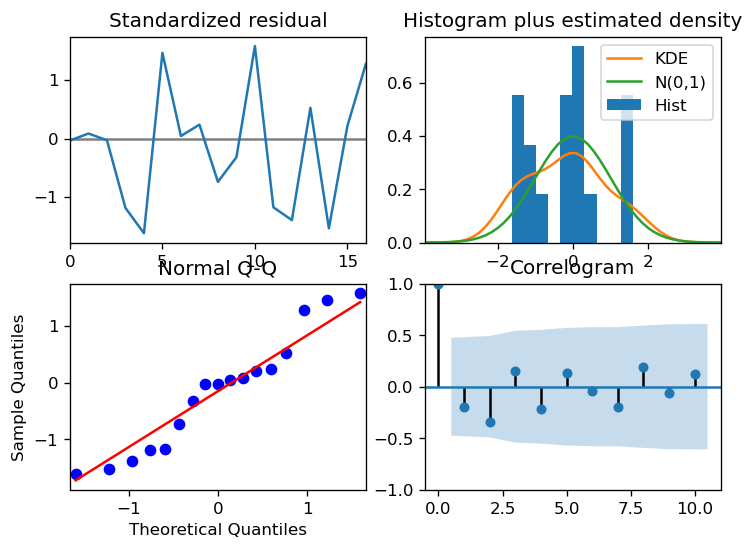

In [32]:
smodel.plot_diagnostics(figsize=(7,5))
plt.show()

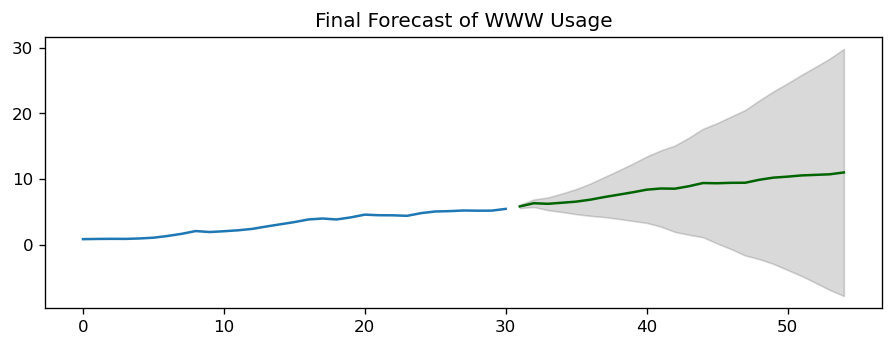

In [33]:
# Forecast
n_periods = 24
fc, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()